[Time Series Talk : Seasonal ARIMA Model](https://www.youtube.com/watch?v=WjeGUs6mzXg&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=23)

[Coding the SARIMA Model : Time Series Talk](https://www.youtube.com/watch?v=Al8m6K_stfA&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=24)

SARIMA is used for seasonal changes. The **"S"** denotes the seasonal change that repeats itself, the **"AR"** denotes the Auto-Regressive used for prediction, the **"I"** denotes the integrated factor wether the trend is upwards or downwards usind differencing to make it stationary. The **"MA"** denotes the moving average.  

**SARIMA (or Seasonal Arima Model):**
$$ARIMA(p,d,q)(P,D,Q)_{m}$$
1. The $p$ corresponds to the $AR$ peice
2. The $d$ corresponds to the $I$ peice
3. The $q$ corresponds to the order of the $MA$ peice
4. $P$, $D$ and $Q$ have the same analog as the previous but more in a seasonal sense
5. $m$ is the seasonal factor which is the number of periods within a year which takes for the seasonality to repeat

For Example: $ARIMA(1,1,1)(1,1,1)_{4} = (1-\phi_{1} B)(1-\phi_{1} B^{4})(1-B)(1-B^{4})y_{t} = (1+\theta_{1} B)(1+\Theta_{1} B^{4})\epsilon_{t}$

1. $B$ is the back shift operator
2. $(1-B)$ for $d$ = 1 
3. $(1-B^{4})$ for $D$ = 1 and $m$ = 4 to backshift by 4 time periods
4. $(1-\phi_{1} B)$ fpr $p$ = 1
5. $(1-\Phi_{1} B^{4})$ for $P$ = 1, and $m$ = 4 to backshift by 4 time periods
6. $(1+\theta_{1} B)$ for $q$ = 1
7. $(1+\Theta_{1} B^{4})$ for $Q$ = 1, and $m$ = 4 to backshift by 4 time periods 

Another Simpler Example: $ARIMA(1,0,0)(0,1,1)_{4} = (1-\phi_{1} B)(1-B^{4})y_{t} = (1+\Theta_{1} B^{4})\epsilon_{t}$ 

1. $(1-\phi_{1} B)(1-B^{4})y_{t} = (1+\Theta_{1} B^{4})\epsilon_{t}$
2. $(1-\phi_{1}B - B^{4} + \phi_{1}B^{5})y_{t} = \epsilon_{t} + \Theta_{1}\epsilon_{t-4}$
3. $y_{1} - y_{t-4} = \phi_{1}y_{t-1}-\phi_{1}y_{t-5}+\Theta_{1}\epsilon_{t-4}+\epsilon_{t}$
4. Let: $z_{t} = y_{t} - y_{t-4}$ => $z_{t} = \phi_{1}z_{t-1} + \Theta_{1}\epsilon_{t-4}+\epsilon_{t}$
5. $z_{t}$ is the new time prediction
6. $z_{t-1}$ is the time prediction 1 time period ago
7. $\epsilon_{t}$ is the error now
8. $\epsilon_{t-4}$ is the error 4 time periods ago from $Q$

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

import warnings
warnings.filterwarnings("ignore")

In [155]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d-%h-%m')

                      timestamp  kpi_value  request_count  anomaly_label
0     2020-08-14 02:00:00+02:00   0.998755          24908              0
1     2020-08-14 02:01:00+02:00   0.997683          25029              0
2     2020-08-14 02:02:00+02:00   0.998341          24115              0
3     2020-08-14 02:03:00+02:00   0.998211          24031              0
4     2020-08-14 02:04:00+02:00   0.998403          23790              0
...                         ...        ...            ...            ...
20154 2020-08-28 01:56:00+02:00   0.998149          26467              0
20155 2020-08-28 01:57:00+02:00   0.998340          26502              0
20156 2020-08-28 01:58:00+02:00   0.998364          26887              0
20157 2020-08-28 01:59:00+02:00   0.998428          26712              0
20158 2020-08-28 02:00:00+02:00   0.997407          29694              0

[20159 rows x 4 columns]
This dataset has the same seasonal pattern 14 times in other words, we have 14 U's
We have 1440 po

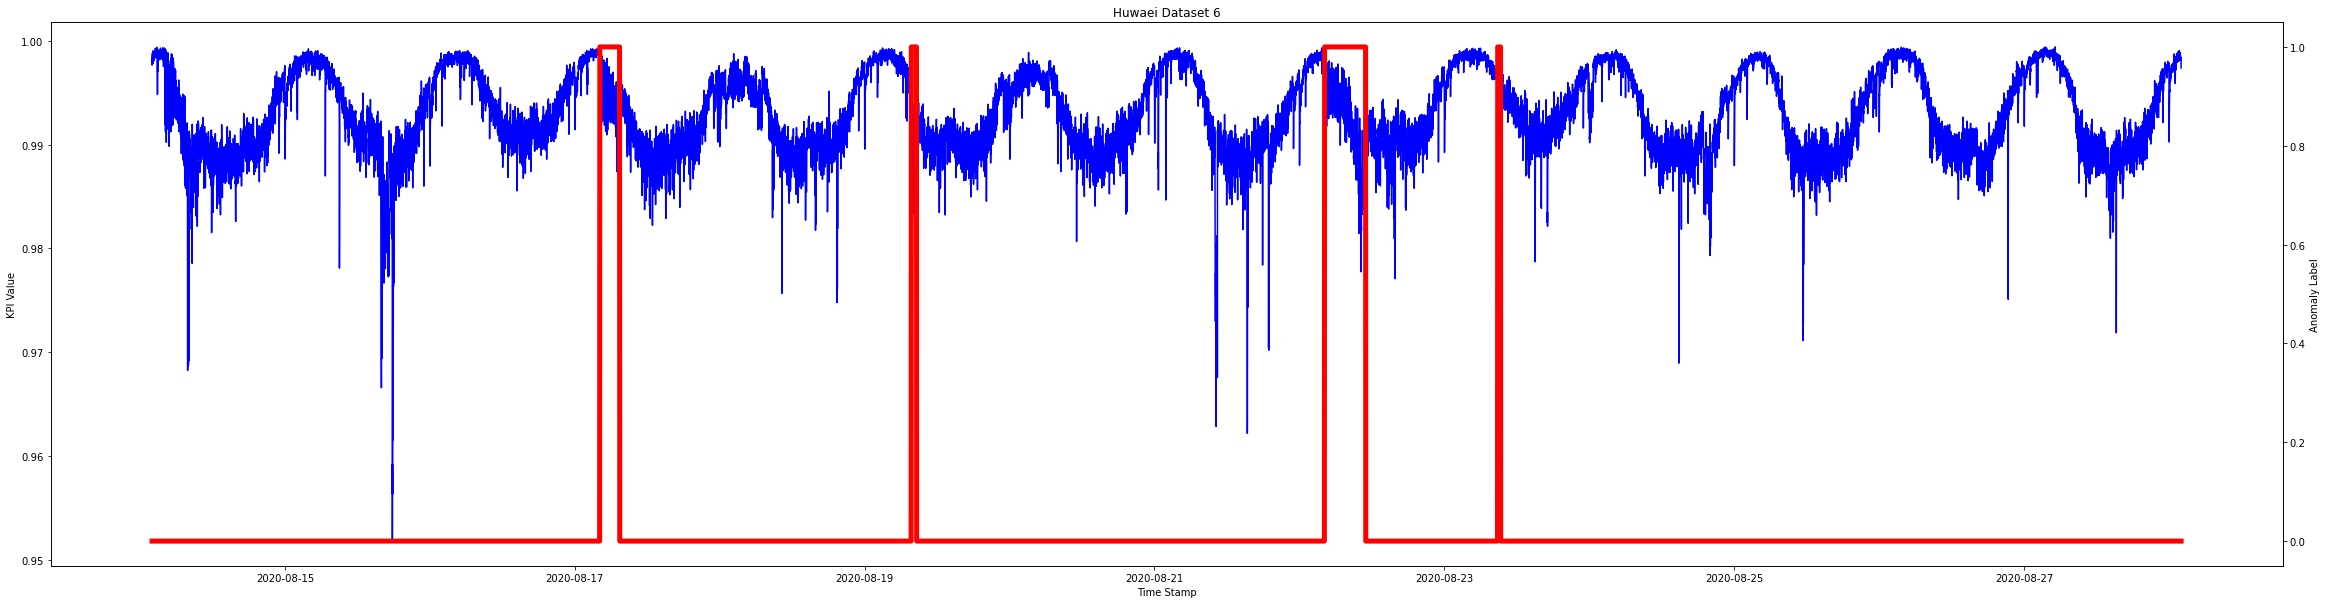

In [210]:
huwaei=pd.read_csv('training_100.csv')
huwaei['timestamp']=pd.to_datetime(huwaei['timestamp'])
print(huwaei)

fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(huwaei['timestamp'], huwaei['kpi_value'], color='blue')
ax2a.plot(huwaei['timestamp'], huwaei['anomaly_label'], color='red', linewidth='5')
ax2d.set_xlabel('Time Stamp')
ax2d.set_ylabel('KPI Value')
ax2a.set_ylabel('Anomaly Label')
ax2d.title.set_text('Huwaei Dataset 6')
print("This dataset has the same seasonal pattern 14 times in other words, we have 14 U's")
print("We have 1440 points daily")
print("The seasonal factor in this case is 2")
huwaei.info()

                timestamp     value  label
0     2016-07-24 20:00:00  0.847300      0
1     2016-07-24 20:05:00 -0.036137      0
2     2016-07-24 20:10:00  0.074292      0
3     2016-07-24 20:15:00  0.074292      0
4     2016-07-24 20:20:00 -0.036137      0
...                   ...       ...    ...
17563 2016-09-23 19:35:00  0.074292      0
17564 2016-09-23 19:40:00  0.295152      0
17565 2016-09-23 19:45:00  0.074292      0
17566 2016-09-23 19:50:00 -0.146567      0
17567 2016-09-23 19:55:00 -0.036137      0

[17568 rows x 3 columns]
We have 288 points daily
We have 8064 points monthly
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  17568 non-null  datetime64[ns]
 1   value      17568 non-null  float64       
 2   label      17568 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 

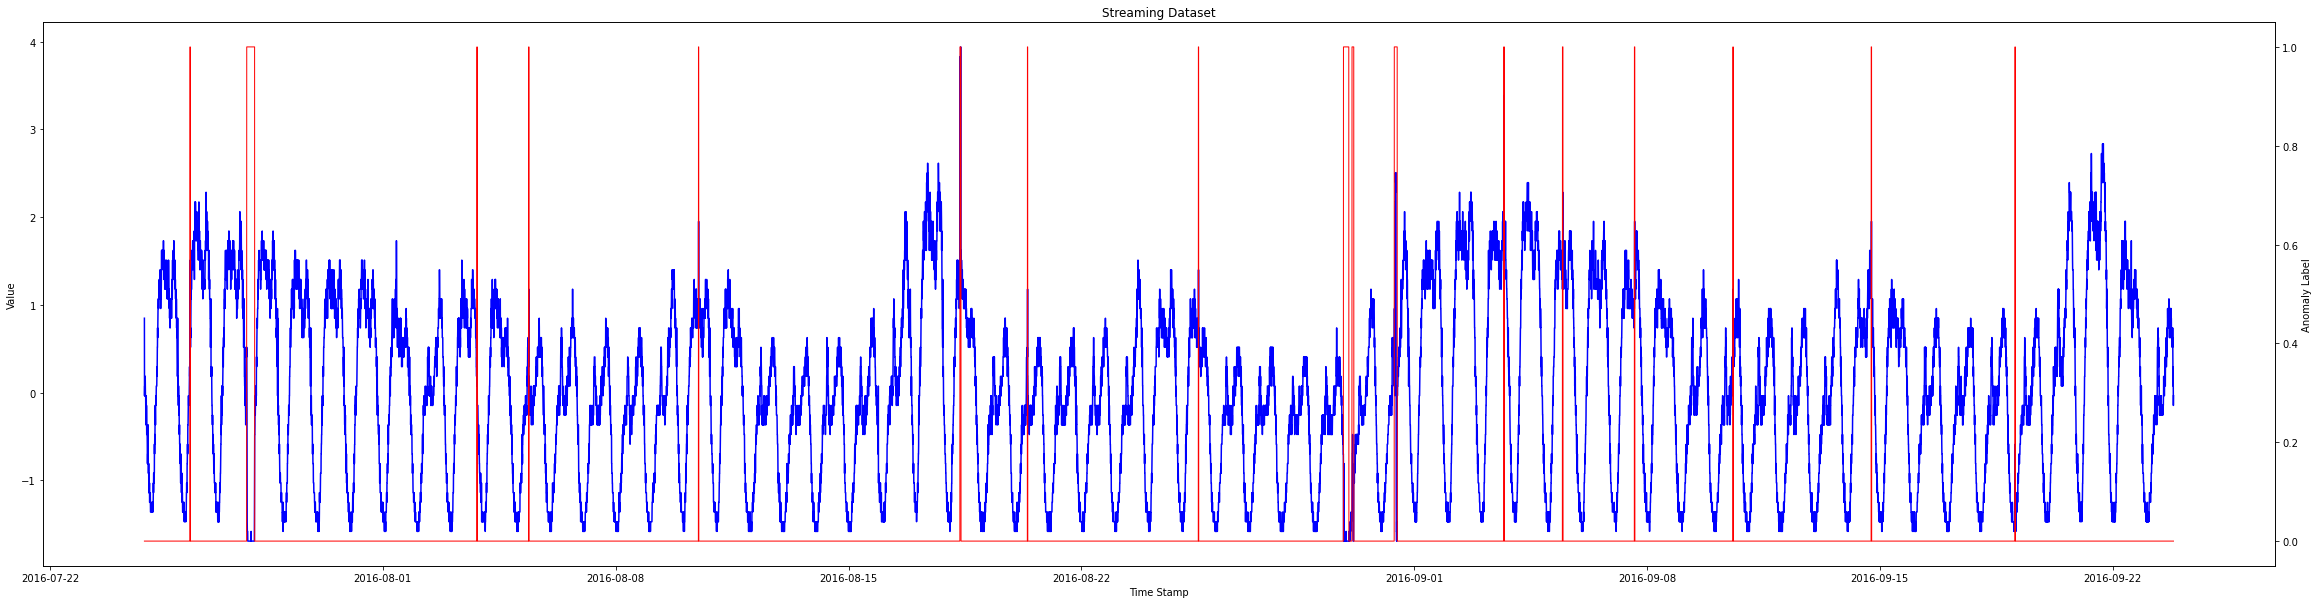

In [212]:
streaming=pd.read_csv('cpu4.csv')

for i in range(len(streaming)):
    streaming['timestamp'].iloc[i]=datetime.fromtimestamp(streaming['timestamp'].iloc[i]) #We are given the timestamp as a unix code
cols=[i for i in streaming.columns if i not in ['timestamp']]
for col in cols:
    streaming[col]=pd.to_numeric(streaming[col])
streaming['timestamp'] = pd.to_datetime(streaming['timestamp'])
print(streaming)

fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(streaming['timestamp'], streaming['value'], color='blue')
ax2a.plot(streaming['timestamp'], streaming['label'], color='red', linewidth='1')
ax2d.set_xlabel('Time Stamp')
ax2d.set_ylabel('Value')
ax2a.set_ylabel('Anomaly Label')
ax2d.title.set_text('Streaming Dataset')
print("We have 288 points daily")
print("We have 8064 points monthly")
streaming.info()

# Remove The Trends

In [158]:
huwaei_first_diff = huwaei.diff()[1:]
streaming_first_diff = streaming.diff()[1:]

In [159]:
print(huwaei_first_diff)
print("--------------------")
print(streaming_first_diff)

            timestamp  kpi_value  request_count  anomaly_label
1     0 days 00:01:00  -0.001073          121.0            0.0
2     0 days 00:01:00   0.000659         -914.0            0.0
3     0 days 00:01:00  -0.000131          -84.0            0.0
4     0 days 00:01:00   0.000192         -241.0            0.0
5     0 days 00:01:00  -0.000088          -50.0            0.0
...               ...        ...            ...            ...
20154 0 days 00:01:00  -0.000239         -824.0            0.0
20155 0 days 00:01:00   0.000191           35.0            0.0
20156 0 days 00:01:00   0.000024          385.0            0.0
20157 0 days 00:01:00   0.000064         -175.0            0.0
20158 0 days 00:01:00  -0.001021         2982.0            0.0

[20158 rows x 4 columns]
--------------------
            timestamp     value  label
1     0 days 00:05:00 -0.883438    0.0
2     0 days 00:05:00  0.110430    0.0
3     0 days 00:05:00  0.000000    0.0
4     0 days 00:05:00 -0.110430    0.0
5 

Text(0, 0.5, 'KPI Value')

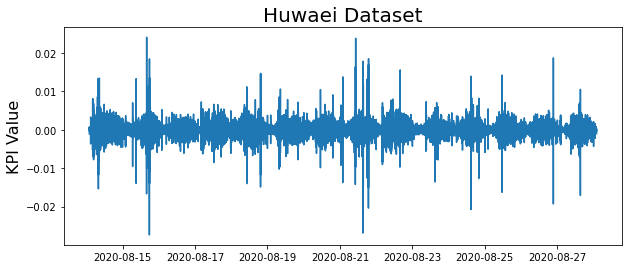

In [160]:
plt.figure(figsize=(10,4))
plt.plot(huwaei['timestamp'][1:20159], huwaei_first_diff['kpi_value'])
plt.title('Huwaei Dataset', fontsize=20)
plt.ylabel('KPI Value', fontsize=16)

Text(0, 0.5, 'CPU Value')

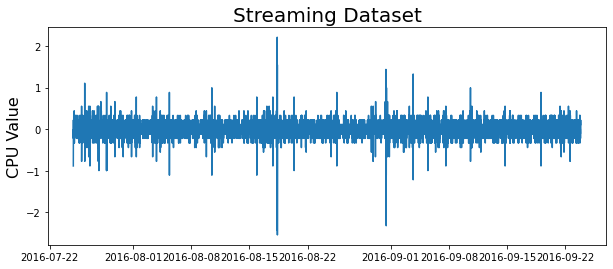

In [161]:
plt.figure(figsize=(10,4))
plt.plot(streaming['timestamp'][1:17568], streaming_first_diff['value'])
plt.title('Streaming Dataset', fontsize=20)
plt.ylabel('CPU Value', fontsize=16)

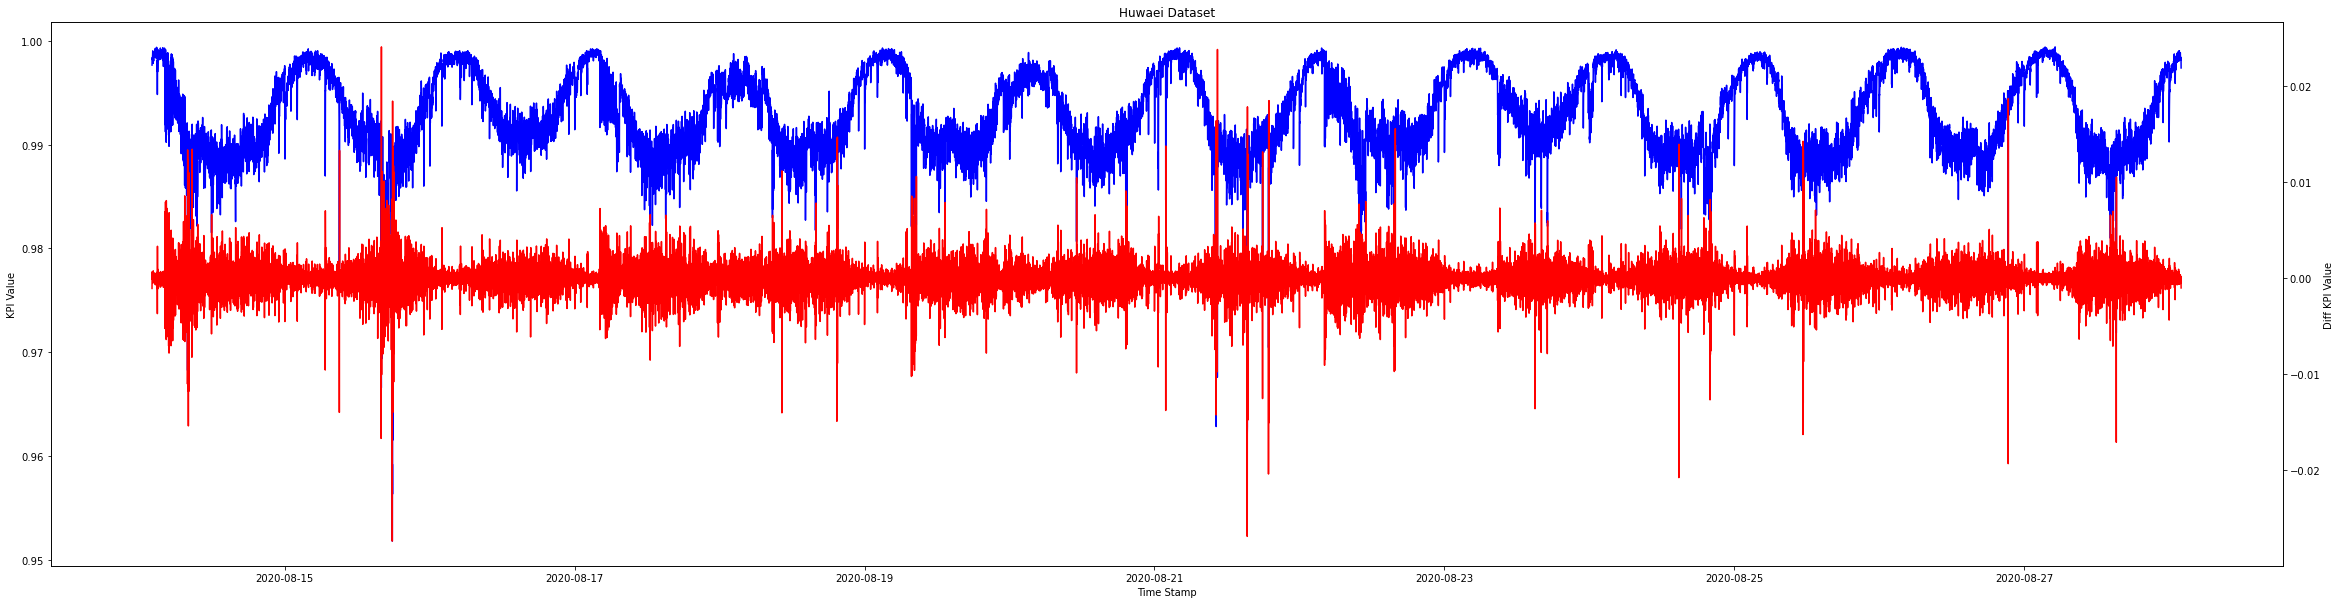

In [162]:
fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(huwaei['timestamp'][1:20159], huwaei['kpi_value'][1:20159], color='blue')
ax2a.plot(huwaei['timestamp'][1:20159], huwaei_first_diff['kpi_value'], color='red')
ax2d.set_xlabel('Time Stamp')
ax2d.set_ylabel('KPI Value')
ax2a.set_ylabel('Diff KPI Value')
ax2d.title.set_text('Huwaei Dataset')

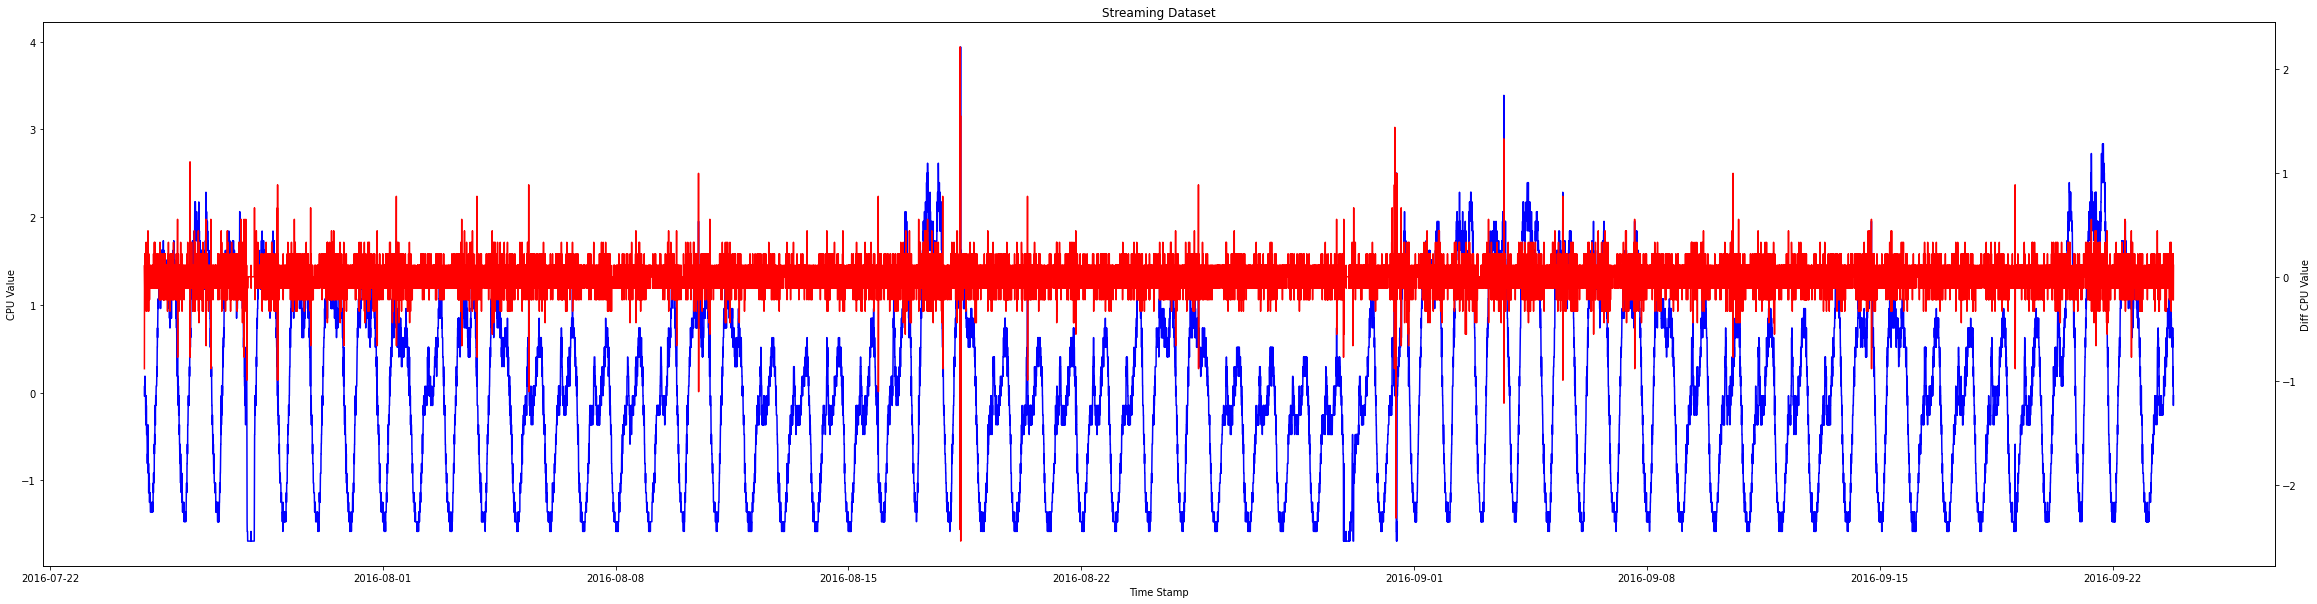

In [163]:
fig, ax2d = plt.subplots(figsize=(40,10))
ax2a = ax2d.twinx()
ax2d.plot(streaming['timestamp'][1:17568], streaming['value'][1:17568], color='blue')
ax2a.plot(streaming['timestamp'][1:17568], streaming_first_diff['value'], color='red')
ax2d.set_xlabel('Time Stamp')
ax2d.set_ylabel('CPU Value')
ax2a.set_ylabel('Diff CPU Value')
ax2d.title.set_text('Streaming Dataset')

# ACF

<BarContainer object of 20 artists>

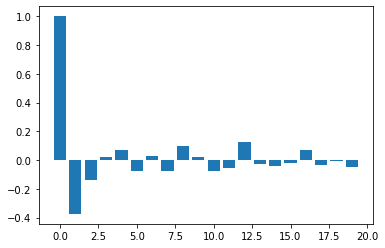

In [208]:
huwaei_acf_vals = acf(huwaei_first_diff['kpi_value'])
num_lags = 20
plt.bar(range(num_lags), huwaei_acf_vals[:num_lags])

1 lag for Huwaei's ACF

<BarContainer object of 20 artists>

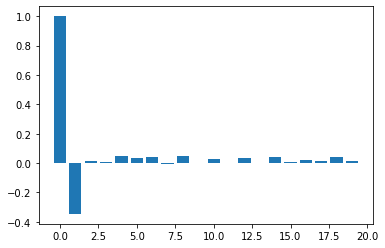

In [209]:
streaming_acf_vals = acf(streaming_first_diff['value'])
num_lags = 20
plt.bar(range(num_lags), streaming_acf_vals[:num_lags])

1 lag for Streaming's ACF

# Based on ACF, we should start with a seasonal MA Process

# PACF

<BarContainer object of 15 artists>

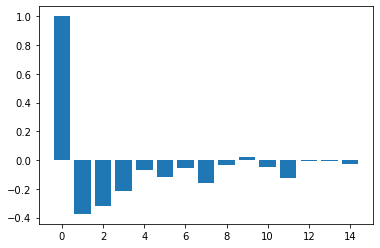

In [166]:
huwaei_pacf_vals = pacf(huwaei_first_diff['kpi_value'])
num_lags = 15
plt.bar(range(num_lags), huwaei_pacf_vals[:num_lags])

9 lag for Huwaei's PACF

<BarContainer object of 15 artists>

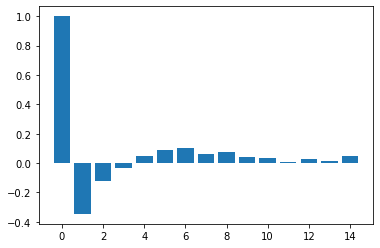

In [167]:
streaming_pacf_vals = pacf(streaming_first_diff['value'])
num_lags = 15
plt.bar(range(num_lags), streaming_pacf_vals[:num_lags])

6 lag for Streaming's PACF

# Based on PACF, we should start with a seasonal AR Process

# Get Training and Testing Sets

In [168]:
#Huwaei
percent_test=70
percent_test=percent_test/100

time=huwaei['timestamp']
time_point_huwaei=time[round(len(huwaei)*percent_test)]
time_point_huwaei

huwaei_train, huwaei_test = huwaei.loc[huwaei['timestamp'] <= time_point_huwaei], huwaei.loc[huwaei['timestamp'] > time_point_huwaei]

print(f"Number of Training Data For Huwaei: {huwaei_train.shape[0]}")
print(f"Number of Testing Data For Huwaei: {huwaei_test.shape[0]}")


Number of Training Data For Huwaei: 14112
Number of Testing Data For Huwaei: 6047


In [169]:
#Streaming
percent_test=70
percent_test=percent_test/100

time=streaming['timestamp']
time_point_streaming=time[round(len(streaming)*percent_test)]
time_point_streaming

streaming_train, streaming_test = streaming.loc[streaming['timestamp'] <= time_point_streaming], streaming.loc[streaming['timestamp'] > time_point_streaming]

print(f"Number of Training Data For Streaming: {streaming_train.shape[0]}")
print(f"Number of Testing Data For Streaming: {streaming_test.shape[0]}")


Number of Training Data For Streaming: 12299
Number of Testing Data For Streaming: 5269


# Fit the SARIMA Model

In [258]:
# 1440 minute
# 24 hour

huwaei_order = (0,1,0)
huwaei_seasonal_order = (1, 0, 1, 12)

# define model for Huwaei
huwaei_model = SARIMAX(huwaei_train['kpi_value'], order=huwaei_order, seasonal_order=huwaei_seasonal_order)

# start=time()
# huwaei_model_fit = huwaei_model.fit()
# end=time()

# print(f"Model Fitting Time For Huwaei: {round((end - start),4)} seconds")

In [251]:
streaming_order = (0,1,0)
streaming_seasonal_order = (1, 0, 1, 4)

# define model for Streaming
streaming_model = SARIMAX(streaming_train['value'], order=streaming_order, seasonal_order=streaming_seasonal_order)

# start=time()
# streaming_model_fit = streaming_model.fit();
# end=time()

# print(f"Model Fitting Time For Streaming: {round((end - start),4)} seconds")

In [252]:
print(huwaei_model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            kpi_value   No. Observations:                14112
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood               68432.937
Date:                              Fri, 19 Aug 2022   AIC                        -136859.874
Time:                                      11:54:01   BIC                        -136837.210
Sample:                                           0   HQIC                       -136852.332
                                            - 14112                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.2197      0.045      4.926      0.000       0.132       0.307
ma.S.L12      -0.09

In [253]:
print(streaming_model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                               value   No. Observations:                12299
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 4)   Log Likelihood                5895.638
Date:                             Fri, 19 Aug 2022   AIC                         -11785.276
Time:                                     11:54:02   BIC                         -11763.024
Sample:                                          0   HQIC                        -11777.821
                                           - 12299                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4        0.9999   5.94e-05   1.68e+04      0.000       1.000       1.000
ma.S.L4       -0.9985      

Text(0, 0.5, 'Error')

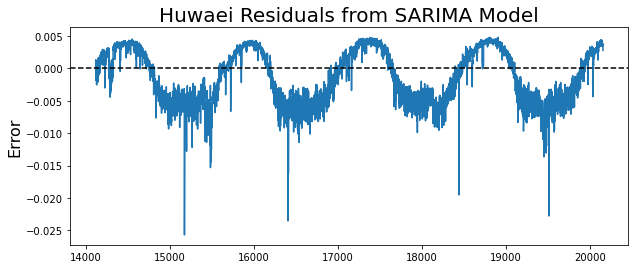

In [254]:
#get the predictions and residuals for Huwaei
huwaei_predictions = huwaei_model_fit.forecast(len(huwaei_test))
huwaei_predictions = pd.Series(huwaei_predictions, index=huwaei_test.index)
huwaei_residuals = huwaei_test['kpi_value'] - huwaei_predictions

plt.figure(figsize=(10,4))
plt.plot(huwaei_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Huwaei Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Error')

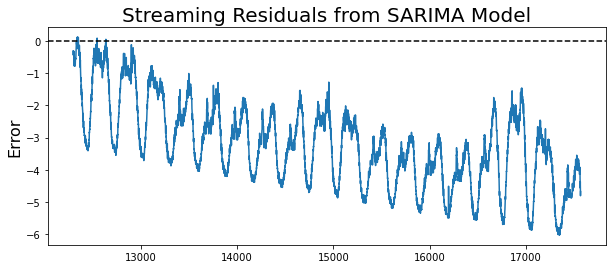

In [255]:
#get the predictions and residuals for Streaming
streaming_predictions = streaming_model_fit.forecast(len(streaming_test))
streaming_predictions = pd.Series(streaming_predictions, index=streaming_test.index)
streaming_residuals = streaming_test['value'] - streaming_predictions

plt.figure(figsize=(10,4))
plt.plot(streaming_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Streaming Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

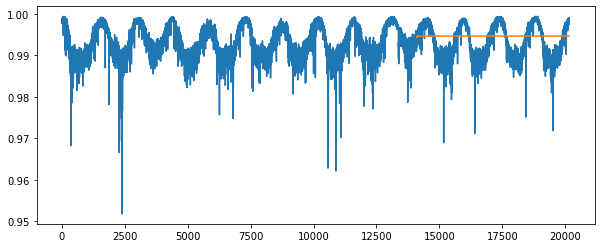

In [256]:
plt.figure(figsize=(10,4))

plt.plot(huwaei['kpi_value'])
plt.plot(huwaei_predictions)

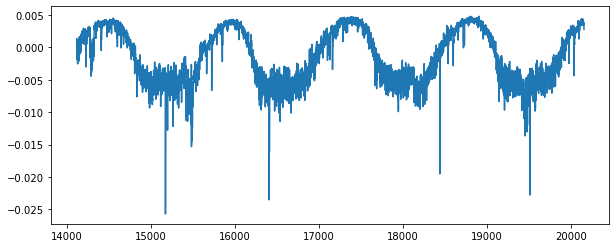

In [257]:
plt.figure(figsize=(10,4))
plt.plot(huwaei_residuals)

From the prediction curve if the difference between the prediction and the data are high then there is a chance we can detect anomlies. In other words, we should find the difference between the two curves. We could take values from this curve and use it prediction, however we are only predicitng the sine curves peak. 

In [179]:
print('Mean Absolute Percent Error Huwaei:', round(np.mean(abs(huwaei_residuals/huwaei_test['kpi_value'])),4))
print('Mean Absolute Percent Error Streaming:', round(np.mean(abs(streaming_residuals/streaming_test['value'])),4))

Mean Absolute Percent Error Huwaei: 0.0038
Mean Absolute Percent Error Streaming: 10.3955


In [180]:
print(f"Root Mean Squared Error Huwaei: {round(np.sqrt(np.mean(huwaei_residuals**2)),6)}")
print(f"Root Mean Squared Error Streaming: {round(np.sqrt(np.mean(streaming_residuals**2)),6)}")

Root Mean Squared Error Huwaei: 0.004324
Root Mean Squared Error Streaming: 3.447238


# Using the Rolling Forecast Origin

In [193]:
train_end_huwaei = time_point_huwaei
test_end_huwaei= huwaei['timestamp'][20158]
print(f"Huwaei Training End Time: {train_end_huwaei}")
print(f"Huwaei Testing End Time: {test_end_huwaei}")
print("-----------------------------------------------------------")
train_end_streaming = time_point_streaming
test_end_streaming= streaming['timestamp'][17567]
print(f"Streaming Training End Time: {train_end_streaming}")
print(f"Streaming Testing End Time: {test_end_streaming}")

Huwaei Training End Time: 2020-08-23 21:11:00+02:00
Huwaei Testing End Time: 2020-08-28 02:00:00+02:00
-----------------------------------------------------------
Streaming Training End Time: 2016-09-05 12:50:00
Streaming Testing End Time: 2016-09-23 19:55:00


In [197]:
rolling_predictions_huwaei = huwaei_test['kpi_value'].copy()
rolling_predictions_streaming = streaming_test['value'].copy()

In [202]:
huwaei_train['kpi_value']

0        0.998755
1        0.997683
2        0.998341
3        0.998211
4        0.998403
           ...   
14107    0.993618
14108    0.994434
14109    0.993206
14110    0.992870
14111    0.994446
Name: kpi_value, Length: 14112, dtype: float64